In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
import pandas as pd
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt 
import seaborn as sn                  
%matplotlib inline
import warnings                     
warnings.filterwarnings("ignore")

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [0]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [0]:
train.shape,test.shape

((31647, 18), (13564, 17))

In [0]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [0]:
test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [0]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [0]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [0]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [0]:
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

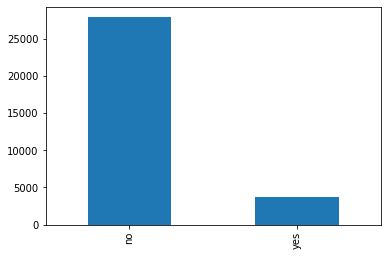

In [0]:
train['subscribed'].value_counts().plot.bar()

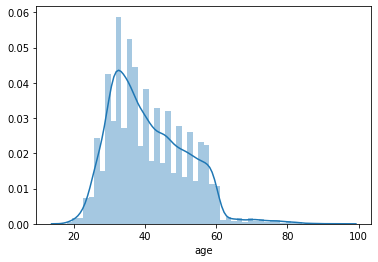

In [0]:
sn.distplot(train["age"])

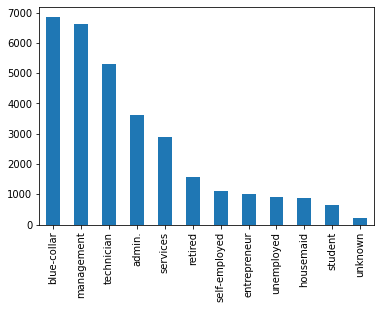

In [0]:
train['job'].value_counts().plot.bar()

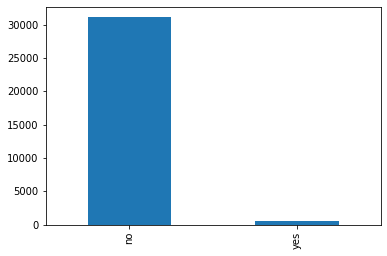

In [0]:
train['default'].value_counts().plot.bar()

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

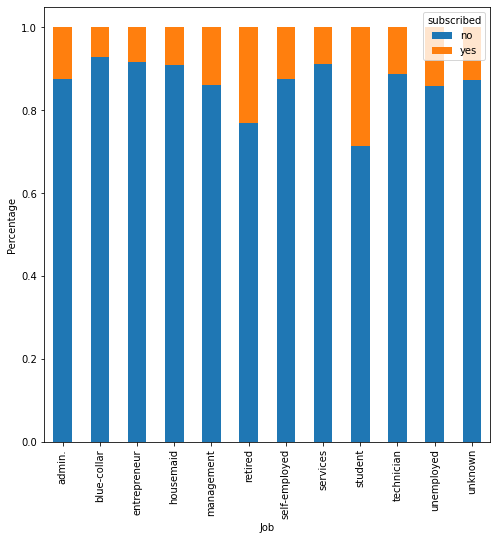

In [0]:
print(pd.crosstab(train['job'],train['subscribed']))

job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

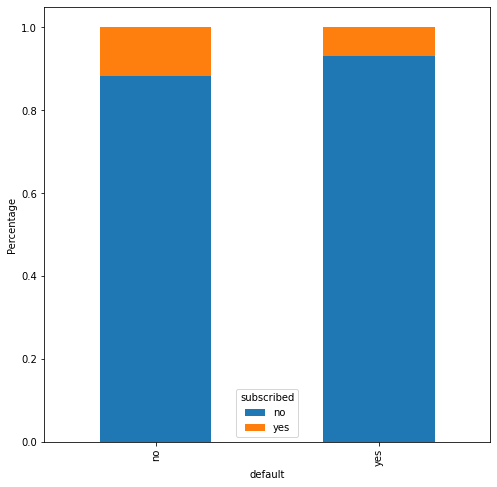

In [0]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

In [0]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)
print(train['subscribed'].head())

0    0
1    0
2    0
3    1
4    0
Name: subscribed, dtype: int64


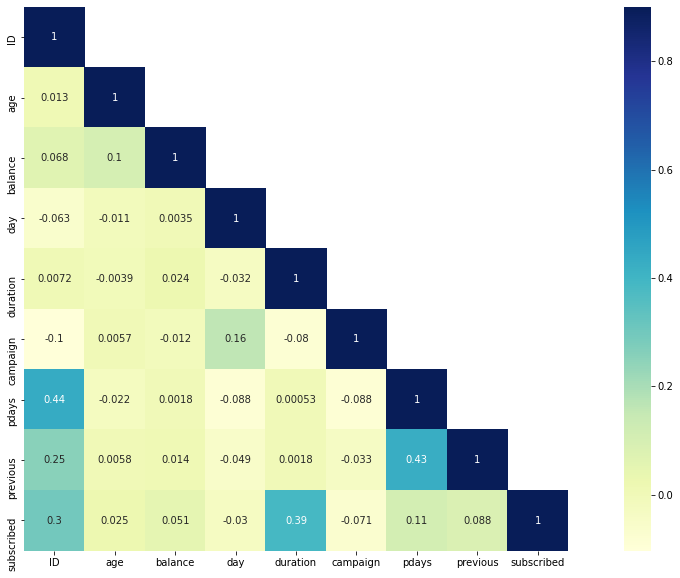

In [0]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [0]:
target = train['subscribed']
train = train.drop('subscribed',1)

In [0]:
train = pd.get_dummies(train)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
xtrain,xtest, ytrain, ytest = train_test_split(train, target, test_size = 0.2, random_state=12)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
lreg = LogisticRegression(penalty='l2')
lreg.fit(xtrain,ytrain)
prediction = lreg.predict(xtest)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, prediction)

0.8913112164296998

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(xtrain,ytrain)
predict = clf.predict(xtest)
accuracy_score(ytest, predict)

0.9042654028436019

In [0]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(criterion='gini',n_estimators=100,random_state=1,n_jobs=2)
forest.fit(xtrain,ytrain)
pred=forest.predict(xtest)
accuracy_score(ytest,pred)

0.9105845181674566

In [0]:
from google.colab import files
uploaded1 = files.upload()

In [0]:
test = pd.get_dummies(test)
test_prediction = clf.predict(test)
submission = pd.DataFrame()
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)
submission.to_csv('submission.csv', header=True, index=False)